In [364]:
%reset
import pandas as pd
import matplotlib.pyplot as plt
from numpy import NaN as NaN

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [372]:
df = pd.read_excel('usd.xlsx')

In [373]:
for i in range(len(df)):
    df['Date'] = pd.to_datetime(df['Date'], format = '%d.%m.%y')
temp = df.copy()
res_df = pd.DataFrame({
    'buy_on': NaN,
    'b_USD': NaN,
    'sell_on': NaN,
    's_USD': NaN,
    'amount': 1000000,
}, index=[0])

In [374]:
for j in range(3):
    maxi = 0
    for i in range(len(df)):
        try:
            k = 1
            while (df.loc[i+k, 'Date'] - df.loc[i, 'Date']).days <= 7 :
                if df.loc[i+k, 'USD/KZT'] / df.loc[i, 'USD/KZT'] > maxi:
                    maxi = df.loc[i+k, 'USD/KZT'] / df.loc[i, 'USD/KZT']
                    buy = df.loc[i, 'Date']
                    b_usd = df.loc[i, 'USD/KZT']
                    sell = df.loc[i+k, 'Date']
                    s_usd = df.loc[i+k, 'USD/KZT'] 
                k+=1
        except:
            continue
    if buy in res_df.values:
        continue
    idx_buy = list(df[df['Date']==buy].index)[0]
    idx_sell = list(df[df['Date']==sell].index)[0]
    df.drop(df.index[idx_buy:idx_sell], inplace=True)
    df.reset_index(drop=True, inplace=True)
    res_df.loc[len(res_df),:]=[buy, b_usd, sell, s_usd, 0]
#     df = df[list(df[df['Date']==sell].index)[0]+1:]

In [375]:
# df[df['Date']==buy].reset_index().loc[0, 'USD/KZT']
res_df

,buy_on,b_USD,sell_on,s_USD,amount
0,NaN,NaN,NaN,NaN,1000000.0
1,2020-09-02 00:00:00,418.13,2020-09-09 00:00:00,426.06,0.0
2,2020-06-08 00:00:00,397.44,2020-06-15 00:00:00,404.70,0.0
3,2020-07-03 00:00:00,405.56,2020-07-10 00:00:00,412.23,0.0


In [376]:
res_df.sort_values(by='buy_on', na_position='first', inplace = True)
res_df.reset_index(drop=True, inplace=True)
for i in range(1, len(res_df)):
    res_df.loc[i, 'amount'] = (res_df.loc[i-1, 'amount']/res_df.loc[i, 'b_USD'])*res_df.loc[i, 's_USD']
res_df

,buy_on,b_USD,sell_on,s_USD,amount
0,NaN,NaN,NaN,NaN,1.000000e+06
1,2020-06-08 00:00:00,397.44,2020-06-15 00:00:00,404.70,1.018267e+06
2,2020-07-03 00:00:00,405.56,2020-07-10 00:00:00,412.23,1.035014e+06
3,2020-09-02 00:00:00,418.13,2020-09-09 00:00:00,426.06,1.054643e+06


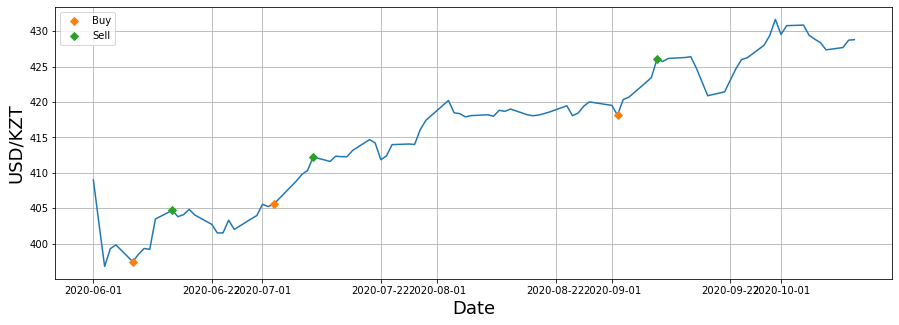

In [377]:
plot_font = {'size': 18}
fig = plt.figure(figsize=(15,5))
markers_buy = [list(temp[temp['Date']==i].index)[0] for i in res_df.loc[1:,'buy_on']]
markers_sell = [list(temp[temp['Date']==i].index)[0] for i in res_df.loc[1:,'sell_on']]
plt.plot(temp['Date'],temp['USD/KZT'])
plt.plot(temp['Date'],temp['USD/KZT'],'D', markevery=markers_buy, label='Buy')
plt.plot(temp['Date'],temp['USD/KZT'],'D', markevery=markers_sell, label='Sell')
plt.xlabel('Date', fontdict=plot_font)
plt.ylabel('USD/KZT', fontdict=plot_font)
plt.grid()
plt.legend()
plt.show()

In [378]:
res_df.loc[len(res_df)-1, 'amount'] - res_df.loc[0, 'amount']

54643.17078116257